In [1]:
from skymap import utils
import numpy as np 
import matplotlib.pyplot as plt
import h5py
from pathlib import Path


In [2]:


datadir : Path = "/Users/akshatha.vydula/packages_310/skymap/data_310/TGBT25B_614_01"

cal_file = datadir + "/310" + "/cal_file_2025_11_16.hdf5"

data_file = datadir + "/310" + "/GBTOBS_2026-01-16T112750.hdf5"

print(cal_file)

obs_data = utils.read_obs_hdf5(data_file)
cal_data = utils.read_cal_hdf5(cal_file)

print(f" Calibration File loaded: {cal_file}")
print(f" Data File loaded: {data_file}")


/Users/akshatha.vydula/packages_310/skymap/data_310/TGBT25B_614_01/310/cal_file_2025_11_16.hdf5
 Calibration File loaded: /Users/akshatha.vydula/packages_310/skymap/data_310/TGBT25B_614_01/310/cal_file_2025_11_16.hdf5
 Data File loaded: /Users/akshatha.vydula/packages_310/skymap/data_310/TGBT25B_614_01/310/GBTOBS_2026-01-16T112750.hdf5


In [3]:
f = h5py.File(data_file, 'r')

print(f['data']['spec'].shape)

(86400, 10, 256)


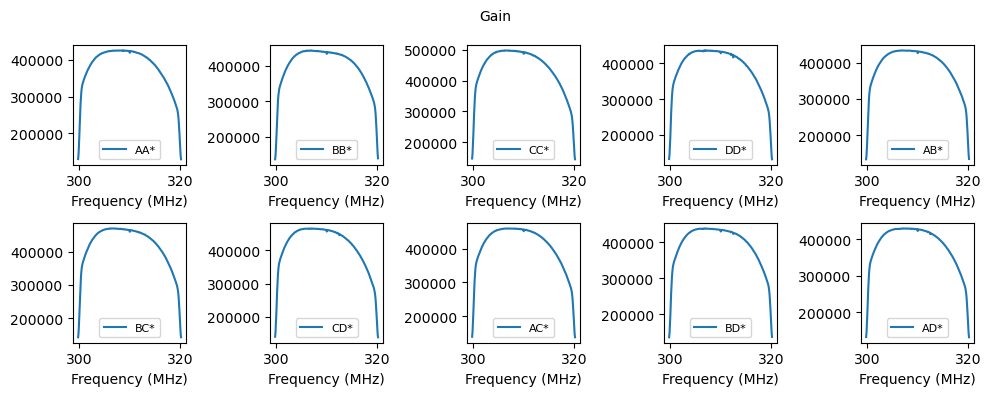

In [4]:
utils.plot_cal_data(cal_data)

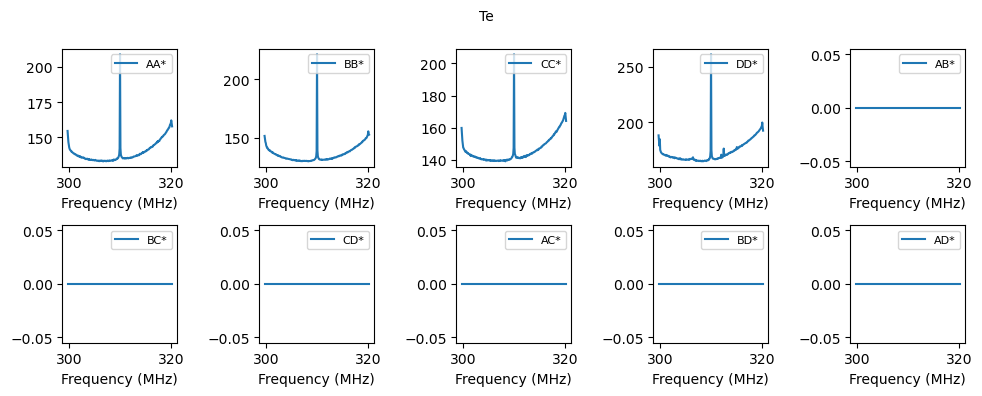

In [5]:
utils.plot_cal_data(cal_data, attribute='te')

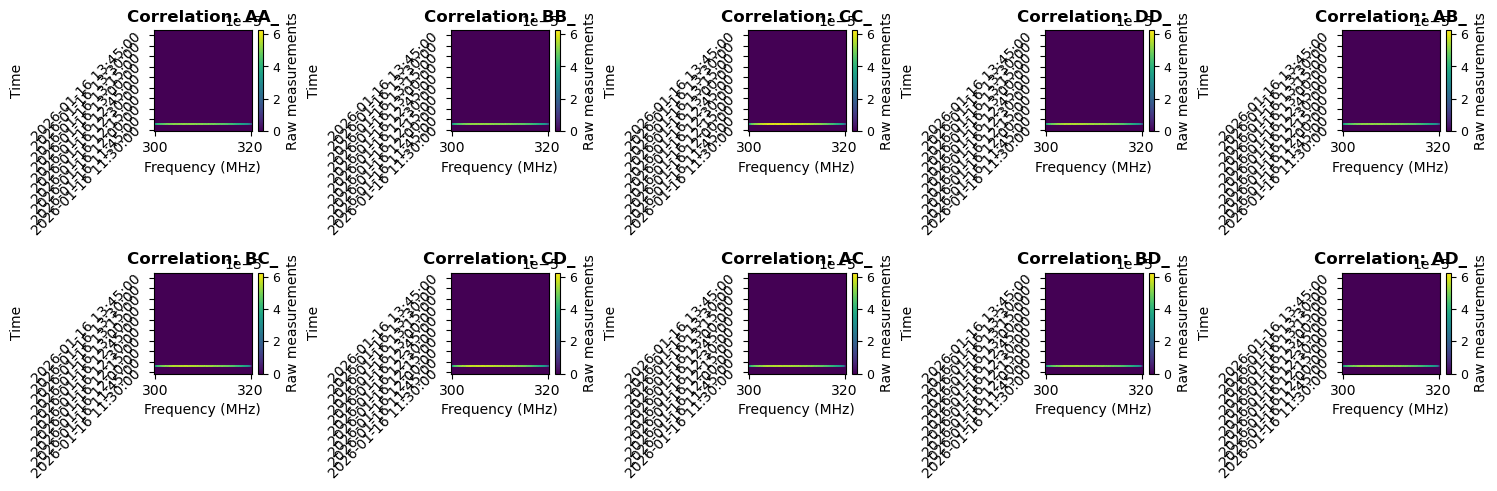

In [6]:
utils.plot_waterwall(obs_data)

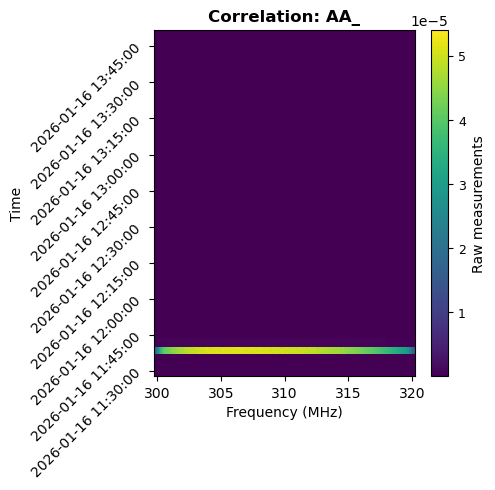

In [14]:
utils.plot_waterwall(obs_data, data_type="magnitude", attribute="AA_")


In [24]:
obs_data.time[-1]

datetime.datetime(2026, 1, 16, 13, 51, 49, 625000)

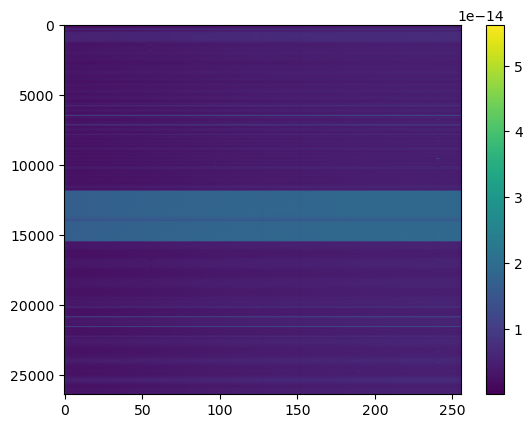

In [30]:
plt.imshow(np.abs(obs_data.spec.AB_[60000:-1]/cal_data.gain[4]) - cal_data.te[4], aspect='auto')
plt.colorbar()

In [31]:
with h5py.File(data_file, 'r') as f:
    dset = f['data']['spec']
    print(list(f['data'].keys()), f['diag'], f['hdr'])
    print("shape:", dset.shape)
    print("dtype:", dset.dtype)
    print("chunks:", dset.chunks)
    print("compression:", dset.compression)

['freq', 'id', 'spec', 'time'] <HDF5 group "/diag" (9 members)> <HDF5 group "/hdr" (0 members)>
shape: (86400, 10, 256)
dtype: complex64
chunks: (64, 2, 32)
compression: None
